# Nivell 1



## Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

El dataset és un dataframe sobre vols en EEUU durant el 2008 que conentenen les següents variables:

* YEAR — Year in which flight took place
* QUARTER — Quarter in which flight took place (1–4)
* MONTH — Month in which flight took place (1–12)
* DAY_OF_MONTH — Day of the month in which flight took place (1–31)
* DAY_OF_WEEK — 1 for Monday, 2 for Tuesday,etc. in which flight took place
* UNIQUE_CARRIER — Airline carrier code
* TAIL_NUM — Aircraft tail number
* FL_NUM — Flight number
* ORIGIN_AIRPORT_ID — ID of origin airport
* ORIGIN — Code of origin airport(ATL, DFW, SEA, etc.)
* DEST_AIRPORT_ID — ID of destination airport
* DEST — Code of destination airport (ATL, DFW, SEA, etc.)
* CRS_DEP_TIME — Scheduled departure time
* DEP_TIME — Actual departure time
* DEP_DELAY — Departure Delay in minutes
* DEP_DEL15 — 1 if departure is delayed by 15 minutes or more else 0
* CRS_ARR_TIME — Scheduled arrival time
* ARR_TIME — Actual arrival time
* ARR_DELAY — Arrival Delay in minutes
* ARR_DEL15 — 1 if arrived late by 15 minutes or more else 0
* CANCELLED — 1 if Flight was cancelled else 0
* DIVERTED — 1 if Flight was diverted else 0
* CRS_ELAPSED_TIME — Scheduled flight time in minutes
* ACTUAL_ELAPSED_TIME — Actual flight time in minutes
* DISTANCE — Distance traveled in miles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fly = pd.read_csv('C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 2/S02 T05 Exploració de les dades/DelayedFlights.csv')

In [3]:
fly.shape

(1936758, 30)

In [4]:
fly.size

58102740

Com és molt gran es començarà fent un mostreig per reduir el dataframe. S'utilitzarà el 10% que correspon a 193676 observacions. Per a que es pogui repetir la selecció s'utilitzarà el paràmetre random_state amb un valor de 42.

In [82]:
fly2 = fly.sample(frac = 0.1, random_state=42)

In [70]:
fly2.shape

(193676, 30)

A continuació es passa a explorar les dades seleccionades.

In [4]:
fly2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193676 entries, 1782417 to 27352
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         193676 non-null  int64  
 1   Year               193676 non-null  int64  
 2   Month              193676 non-null  int64  
 3   DayofMonth         193676 non-null  int64  
 4   DayOfWeek          193676 non-null  int64  
 5   DepTime            193676 non-null  float64
 6   CRSDepTime         193676 non-null  int64  
 7   ArrTime            192968 non-null  float64
 8   CRSArrTime         193676 non-null  int64  
 9   UniqueCarrier      193676 non-null  object 
 10  FlightNum          193676 non-null  int64  
 11  TailNum            193676 non-null  object 
 12  ActualElapsedTime  192836 non-null  float64
 13  CRSElapsedTime     193650 non-null  float64
 14  AirTime            192836 non-null  float64
 15  ArrDelay           192836 non-null  float64
 1

In [5]:
fly2.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1782417,6583804,2008,12,6,6,1805.0,1755,2146.0,2035,YV,...,5.0,99.0,0,N,0,71.0,0.0,0.0,0.0,0.0
512712,1604365,2008,3,23,7,2120.0,1200,2241.0,1333,NW,...,7.0,19.0,0,N,0,543.0,0.0,0.0,0.0,5.0
447137,1395655,2008,3,31,1,1731.0,1710,1819.0,1810,OO,...,3.0,1.0,0,N,0,NaN,NaN,NaN,NaN,NaN
55082,178786,2008,1,6,7,1507.0,1413,1601.0,1509,OO,...,5.0,17.0,0,N,0,0.0,0.0,0.0,0.0,52.0
877634,2972767,2008,5,22,4,637.0,630,812.0,750,CO,...,5.0,16.0,0,N,0,0.0,0.0,15.0,7.0,0.0


In [11]:
fly2.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [83]:
# Eliminem les dues primeres columnes ja que no aporten informació, a més, també s'eliminen les dades en format hora perquè
# no 's'utilitzaran per fer les estadístiques descriptives que demana l'exercici com les dades en format string. 

fly2 = fly2.drop(['Unnamed: 0', 'Year', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'TailNum', 'Origin', 'Dest', 'UniqueCarrier', 'CancellationCode' ], axis= 1)
fly2.head()

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1782417,12,6,6,7281,281.0,220.0,177.0,71.0,10.0,1297,5.0,99.0,0,0,71.0,0.0,0.0,0.0,0.0
512712,3,23,7,131,81.0,93.0,55.0,548.0,560.0,334,7.0,19.0,0,0,543.0,0.0,0.0,0.0,5.0
447137,3,31,1,3676,48.0,60.0,44.0,9.0,21.0,150,3.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN
55082,1,6,7,6573,54.0,56.0,32.0,52.0,54.0,142,5.0,17.0,0,0,0.0,0.0,0.0,0.0,52.0
877634,5,22,4,1869,155.0,140.0,134.0,22.0,7.0,817,5.0,16.0,0,0,0.0,0.0,15.0,7.0,0.0


In [84]:
#Comprobem si hi ha NAs

fly2.isna().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
FlightNum                0
ActualElapsedTime      840
CRSElapsedTime          26
AirTime                840
ArrDelay               840
DepDelay                 0
Distance                 0
TaxiIn                 708
TaxiOut                 43
Cancelled                0
Diverted                 0
CarrierDelay         68740
WeatherDelay         68740
NASDelay             68740
SecurityDelay        68740
LateAircraftDelay    68740
dtype: int64

En aquest punt seria recomenable mirar la distribució de les dades i plantejar-se eliminar les columnes: CarrierDelay, 
WeatherDelay, NASDelay, SecurityDelay i LateAircraftDelay. Ja que aproximadament el 35% de les dades d'aquestes variables son NAs. Igualment, al ser retards associats a certs aspectes com metereologia, etc. es podrien substituir per zero al presuposar que com no hi ha hagut retard per aquestes causes no hi ha retard acumulat i, per tant, el valor és 0.

Després seria bo examinar la distribució de les diferentes variables i substituir NAs en aquells casos que siguin necessaris per realitzar machine learning.

Per un altre costat, com demana l'enunciat es dividirà el dataset de mostra en train i test, utilitzant com en el cas anterior un random_state equivalent a 42.

En "x" s'haurà de determinar primer quines variables poden ser útils per fer la regressió i eliminar dades redundants (com per exemple les que estàn en string i en codi numèric). "y" serà ARR_DELAY que correspon al retard dels vols en minuts.

In [8]:
from sklearn.model_selection import train_test_split

In [85]:
x = fly2.loc[:,fly2.columns!='ArrDelay']
y = fly2.loc[:, 'ArrDelay']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, train_size = 0.7)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135573, 18)
(58103, 18)
(135573,)
(58103,)


Com era d'esperar les dimensions de la part test i del train coincideixen.

In [26]:
type(x_train.columns)

pandas.core.indexes.base.Index

In [88]:
resum = pd.DataFrame(index = x_train.columns, columns = ['mean_x_train', 'mean_x_test', 'std_x_train', 'std_x_test',
                                                         'median_x_train', 'median_x_test'])

In [89]:
resum

,mean_x_train,mean_x_test,std_x_train,std_x_test,median_x_train,median_x_test
Month,NaN,NaN,NaN,NaN,NaN,NaN
DayofMonth,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeek,NaN,NaN,NaN,NaN,NaN,NaN
FlightNum,NaN,NaN,NaN,NaN,NaN,NaN
ActualElapsedTime,NaN,NaN,NaN,NaN,NaN,NaN
CRSElapsedTime,NaN,NaN,NaN,NaN,NaN,NaN
AirTime,NaN,NaN,NaN,NaN,NaN,NaN
DepDelay,NaN,NaN,NaN,NaN,NaN,NaN
Distance,NaN,NaN,NaN,NaN,NaN,NaN
TaxiIn,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
a0 = x_train.mean()

In [91]:
print(len(resum))
print(len(a0))

18
18


In [92]:
a0

Month                   6.110302
DayofMonth             15.752266
DayOfWeek               3.984311
FlightNum            2182.505425
ActualElapsedTime     133.306784
CRSElapsedTime        134.301105
AirTime               108.298560
DepDelay               43.324733
Distance              766.000103
TaxiIn                  6.809516
TaxiOut                18.207205
Cancelled               0.000310
Diverted                0.004153
CarrierDelay           19.304087
WeatherDelay            3.623724
NASDelay               14.968604
SecurityDelay           0.097467
LateAircraftDelay      25.515945
dtype: float64

In [93]:
a1 = x_test.mean()
a2 = x_train.std()
a3 = x_test.std()
a4 = x_train.median()
a5 = x_test.median()

In [94]:
todoX = [a0, a1, a2, a3, a4, a5]
for i in todoX:
    print(len(i))

18
18
18
18
18
18


In [95]:
col = 0

for element in todoX:
    
    for index, value in enumerate(element):
        resum.iloc[index, col] = round(value,2)
    col = col +1

In [96]:
resum

,mean_x_train,mean_x_test,std_x_train,std_x_test,median_x_train,median_x_test
Month,6.11,6.1,3.48,3.47,6.0,6.0
DayofMonth,15.75,15.71,8.77,8.76,16.0,16.0
DayOfWeek,3.98,3.99,2.0,2.0,4.0,4.0
FlightNum,2182.51,2200.01,1941.96,1947.9,1546.0,1557.0
ActualElapsedTime,133.31,133.1,72.21,71.59,116.0,116.0
CRSElapsedTime,134.3,133.99,71.39,70.74,116.0,117.0
AirTime,108.3,108.03,68.67,68.05,90.0,91.0
DepDelay,43.32,43.38,53.53,53.83,24.0,25.0
Distance,766.0,763.03,574.63,569.05,609.0,607.0
TaxiIn,6.81,6.84,5.34,5.37,6.0,6.0


Per facilitar l'avaluació de les dades obtingudes es farà la distancia entre els diferents estadístics descriptius

In [97]:
resum['dif_media'] = resum['mean_x_train'] - resum['mean_x_test']
resum['dif_std'] = resum['std_x_train']-resum['std_x_test']
resum['dif_median'] = resum['median_x_train'] - resum['median_x_test']

In [98]:
resum

,mean_x_train,mean_x_test,std_x_train,std_x_test,median_x_train,median_x_test,dif_media,dif_std,dif_median
Month,6.11,6.1,3.48,3.47,6.0,6.0,0.01,0.01,0.0
DayofMonth,15.75,15.71,8.77,8.76,16.0,16.0,0.04,0.01,0.0
DayOfWeek,3.98,3.99,2.0,2.0,4.0,4.0,-0.01,0.0,0.0
FlightNum,2182.51,2200.01,1941.96,1947.9,1546.0,1557.0,-17.5,-5.94,-11.0
ActualElapsedTime,133.31,133.1,72.21,71.59,116.0,116.0,0.21,0.62,0.0
CRSElapsedTime,134.3,133.99,71.39,70.74,116.0,117.0,0.31,0.65,-1.0
AirTime,108.3,108.03,68.67,68.05,90.0,91.0,0.27,0.62,-1.0
DepDelay,43.32,43.38,53.53,53.83,24.0,25.0,-0.06,-0.3,-1.0
Distance,766.0,763.03,574.63,569.05,609.0,607.0,2.97,5.58,2.0
TaxiIn,6.81,6.84,5.34,5.37,6.0,6.0,-0.03,-0.03,0.0


Com s'observa en la taula anterior la distancia entre les diferents eines estadístiques per a cada valor estudiat no sol arribar al 1 excepte en el flight number, on la diferencia és molt gran. Això pot ser degut a la naturalesa de les dades, ja que correspon al número de vol en comptes de una mètrica. En el cas de la distància també les diferencies superen la unitat. 

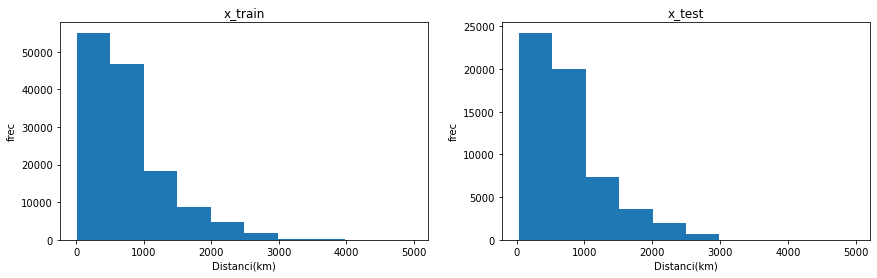

In [111]:
plt.subplot(1,2,1)
plt.hist(x_train['Distance'])
plt.title('x_train')
plt.xlabel('Distància(km)')
plt.ylabel('frec')

plt.subplot(1,2,2)
plt.hist(x_test['Distance'])
plt.title('x_test')
plt.xlabel('Distància(km)')
plt.ylabel('frec')

plt.subplots_adjust(right = 2)
plt.show()

Com es veu en les gràfiques sembla que hi ha en el cas del train valors per sobre de 3000 mentre que en el test no hi ha. Això pot fer que hi hagi aquesta diferència entre els dos casos. Per tant, seria convenient al fer l'aprenentatge dels models que estiguin equilibrats per a que s'entrenin tots els casos respectant les proporcions i evitant overfitting.